# Query Dataset Generation for the Model
-----------



In [1]:
def loads_applied_at_position(position,dataframe):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.set_title("DISTANCE FROM FIXED END: {} mm".format(position),fontsize=20,color='r')
    ax.set_ylabel('LOAD INTENSITY in kN',fontsize=15)
    ax.set_xlabel('LOAD MAGNITUDES in kN',fontsize=15)
    ax.xaxis.labelpad=15
    
    ax.yaxis.set_ticklabels([])
    
    uv=upper_values(position)

    y=dataframe['F(x='+str(position)+')'].iloc[uv-10:uv].values
    x=range(10)
    ax.bar(x,-y)

    ax.xaxis.set(ticks=range(0,10),ticklabels=[100,200,300,400,500,600,700,800,
                                          900,1000])

    plt.grid(True,color='g',ls='-.',lw=0.25)
    plt.show()
    
###################
def upper_values(position):
    return int((1200-position)/20)

###############################################################################################

# To plot the loading diagram for any given load value and load position

def plot_loading(load_value,load_position):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.set_title('LOADING DIAGRAM',fontsize=20,color='r')
    ax.xaxis.labelpad=10
    ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000])
    ax.yaxis.set_ticklabels([])
    
    

    ax.plot([x for x in range(0,1100,100)],[0 for x in range(0,1100,100)],'go-')

    ax.annotate('LOAD={} kN'.format(load_value),xy=(load_position,0),xytext=(load_position,0.02)
            ,arrowprops=dict(facecolor='red',shrink=0.05),fontsize=20)

    ax.annotate('FIXED END',xy=(0,0),xytext=(100,-0.02),
            arrowprops=dict(facecolor='blue',arrowstyle='->'),fontsize=10)
    
    ax.annotate('({},{})'.format(load_position,0),xy=(load_position,0),xytext=(load_position,-0.005)
                ,fontsize=10)

    ax.axis([-50,1050,-0.04,0.04])

    ax.grid(True,color='g',ls='-.',lw=0.25)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    
###########################################################################################

# To check all the different combination of loading 
def check_loading(load_values,load_position,dataframe):
    
    i=0  # this variable will iterate over the different sets (5 sets are here; 1000 mm,800 mm,600...200 mm)
    j=0  # this variable will iterate over the values present inside the set (10 values in each set; 100kN,200...1000kN)
    
    check=True
    
    for val in load_values:
        #print("-"*30)
        #print("\tLOAD: {} kN".format(val))
        #print("\t"+"-"*10)
    
    
        for pos in load_position:
        
            position=obtain_position_from_column_name(pos)
            #print("LOAD POSITION: {} mm".format(position))
            
            if -val!=dataframe[pos].iloc[i:i+1].values:
                print("Mismatch of loading and position")
                print("Load: ",val)
                print("Position: ",position)
                check=False
                
            
            i=i+len(load_values)   # len(load_values) is the step taken for iterating over sets by variable 'i'.
            
        #print('\t'+'-'*(len("CHECK PASS")))
        #print("\tCHECK PASS")
        #print('\t'+'-'*len("CHECK PASS"))
        
        j=j+1    # +1 , is the step taken for iterating over the values of the sets.
        i=j      # For bringing back of the set iterator to the initial position (i.e, set zero)
        
    if check==True:
        print("-"*15+"x"+"-"*15)
        print("All Check Passed")
        print("-"*15+"x"+"-"*15)

    
#####################
def obtain_position_from_column_name(column_name):

    k=column_name.split('=')
    k=k[-1].split(')')
    k=int(k[0])
    return k

#####################################################################################



----------
### STEP 0: Importing dependencies:
----------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
excel_file_1='breadth_200.xlsx'

In [4]:
df_first_shift=pd.read_excel(excel_file_1)

In [5]:
df_first_shift.iloc[:10]

,#,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,# 02/20/2021 15:32:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# The parameters defined in the project are:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#,P1 - Breadth [mm],P2 - Height [mm],P4 - Compressive Ultimate Strength [Pa],P5 - Tensile Ultimate Strength [Pa],P6 - Density [kg m^-3],P13 - Young's Modulus [Pa],P14 - F(x=1000) Y Component [N],P15 - F(x=800) Y Component [N],P16 - F(x=600) Y Component [N],P17 - F(x=400) Y Component [N],P18 - F(x=200) Y Component [N],P12 - Equivalent Stress Maximum [MPa]
3,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# The following header line defines the name o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Name,P1,P2,P4,P5,P6,P13,P14,P15,P16,P17,P18,P12
6,DP 0,200,200,41000000,5000000,2300,30000000000,-100,1e-06,1e-06,1e-06,1e-06,NaN
7,NaN,200,200,41000000,5000000,2300,30000000000,-200,1e-06,1e-06,1e-06,1e-06,NaN
8,NaN,200,200,41000000,5000000,2300,30000000000,-300,1e-06,1e-06,1e-06,1e-06,NaN
9,NaN,200,200,41000000,5000000,2300,30000000000,-400,1e-06,1e-06,1e-06,1e-06,NaN


----------
### STEP 1: Generating $df2$
----------

- **df2**, it will contain 50 rows.
- 5 set of 10 rows.

---
- 10 rows of one set defines, 10 different values for a load at a given position.
    - 100kN,200kN,300kN,...900kN,1000kN, these are 10 values of load which are applied at position x=1000 mm.
    
---
- 5 different sets defines 5 different positions of a beam.
    - x=1000 mm, x= 800 mm, ... x= 200 mm

#### Copying relevant data to a new dataframe $df2$ :
------

In [6]:
df2=pd.DataFrame(data=df_first_shift.iloc[6:56].values,
                 columns=['Name', 'P1', 'P2', 'P4', 'P5', 'P6', 
                          'P13', 'P14', 'P15', 'P16','P17', 'P18', 'P12'])

In [7]:
df2.head(10)

,Name,P1,P2,P4,P5,P6,P13,P14,P15,P16,P17,P18,P12
0,DP 0,200,200,41000000,5000000,2300,30000000000,-100,1e-06,1e-06,1e-06,1e-06,NaN
1,NaN,200,200,41000000,5000000,2300,30000000000,-200,1e-06,1e-06,1e-06,1e-06,NaN
2,NaN,200,200,41000000,5000000,2300,30000000000,-300,1e-06,1e-06,1e-06,1e-06,NaN
3,NaN,200,200,41000000,5000000,2300,30000000000,-400,1e-06,1e-06,1e-06,1e-06,NaN
4,NaN,200,200,41000000,5000000,2300,30000000000,-500,1e-06,1e-06,1e-06,1e-06,NaN
5,NaN,200,200,41000000,5000000,2300,30000000000,-600,1e-06,1e-06,1e-06,1e-06,NaN
6,NaN,200,200,41000000,5000000,2300,30000000000,-700,1e-06,1e-06,1e-06,1e-06,NaN
7,NaN,200,200,41000000,5000000,2300,30000000000,-800,1e-06,1e-06,1e-06,1e-06,NaN
8,NaN,200,200,41000000,5000000,2300,30000000000,-900,1e-06,1e-06,1e-06,1e-06,NaN
9,NaN,200,200,41000000,5000000,2300,30000000000,-1000,1e-06,1e-06,1e-06,1e-06,NaN


#### Obtaining the column names from the original dataset:
------

In [8]:
df_first_shift.iloc[2:3]

,#,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,#,P1 - Breadth [mm],P2 - Height [mm],P4 - Compressive Ultimate Strength [Pa],P5 - Tensile Ultimate Strength [Pa],P6 - Density [kg m^-3],P13 - Young's Modulus [Pa],P14 - F(x=1000) Y Component [N],P15 - F(x=800) Y Component [N],P16 - F(x=600) Y Component [N],P17 - F(x=400) Y Component [N],P18 - F(x=200) Y Component [N],P12 - Equivalent Stress Maximum [MPa]


#### Renaming the column names in $df2$:
-----------

In [9]:
k=df_first_shift.iloc[2:3].values

k=['# ', 'Breadth [mm]', 'Height [mm]',
        'Compressive Ultimate Strength [Pa]',
        'Tensile Ultimate Strength [Pa]', 'Density [kg m^-3]',
        "Young's Modulus [Pa]", 'F(x=1000)',
        'F(x=800)',
        'F(x=600)',
        'F(x=400)',
        'F(x=200)',
        'Equivalent Stress Maximum [MPa]']

df2=pd.DataFrame(data=df_first_shift.iloc[6:56].values,
                 columns=k)

In [10]:
df2.columns

Index(['# ', 'Breadth [mm]', 'Height [mm]',
       'Compressive Ultimate Strength [Pa]', 'Tensile Ultimate Strength [Pa]',
       'Density [kg m^-3]', 'Young's Modulus [Pa]', 'F(x=1000)', 'F(x=800)',
       'F(x=600)', 'F(x=400)', 'F(x=200)', 'Equivalent Stress Maximum [MPa]'],
      dtype='object')

In [11]:
df2.head()

,#,Breadth [mm],Height [mm],Compressive Ultimate Strength [Pa],Tensile Ultimate Strength [Pa],Density [kg m^-3],Young's Modulus [Pa],F(x=1000),F(x=800),F(x=600),F(x=400),F(x=200),Equivalent Stress Maximum [MPa]
0,DP 0,200,200,41000000,5000000,2300,30000000000,-100,1e-06,1e-06,1e-06,1e-06,NaN
1,NaN,200,200,41000000,5000000,2300,30000000000,-200,1e-06,1e-06,1e-06,1e-06,NaN
2,NaN,200,200,41000000,5000000,2300,30000000000,-300,1e-06,1e-06,1e-06,1e-06,NaN
3,NaN,200,200,41000000,5000000,2300,30000000000,-400,1e-06,1e-06,1e-06,1e-06,NaN
4,NaN,200,200,41000000,5000000,2300,30000000000,-500,1e-06,1e-06,1e-06,1e-06,NaN


----------
### STEP 2: Generating $df3$:
-------

- **df3** is the trimmed version of **df2**.
- It will contain only the feature columns.
    - By dropping, extra columns from df2.

In [12]:
df3=df2[['Breadth [mm]', 'Height [mm]',
       'Compressive Ultimate Strength [Pa]', 'Tensile Ultimate Strength [Pa]',
       'Density [kg m^-3]', "Young's Modulus [Pa]", 'F(x=1000)', 'F(x=800)',
       'F(x=600)', 'F(x=400)', 'F(x=200)']]

In [13]:
df3.head()

,Breadth [mm],Height [mm],Compressive Ultimate Strength [Pa],Tensile Ultimate Strength [Pa],Density [kg m^-3],Young's Modulus [Pa],F(x=1000),F(x=800),F(x=600),F(x=400),F(x=200)
0,200,200,41000000,5000000,2300,30000000000,-100,1e-06,1e-06,1e-06,1e-06
1,200,200,41000000,5000000,2300,30000000000,-200,1e-06,1e-06,1e-06,1e-06
2,200,200,41000000,5000000,2300,30000000000,-300,1e-06,1e-06,1e-06,1e-06
3,200,200,41000000,5000000,2300,30000000000,-400,1e-06,1e-06,1e-06,1e-06
4,200,200,41000000,5000000,2300,30000000000,-500,1e-06,1e-06,1e-06,1e-06


In [14]:
df3.columns

Index(['Breadth [mm]', 'Height [mm]', 'Compressive Ultimate Strength [Pa]',
       'Tensile Ultimate Strength [Pa]', 'Density [kg m^-3]',
       'Young's Modulus [Pa]', 'F(x=1000)', 'F(x=800)', 'F(x=600)', 'F(x=400)',
       'F(x=200)'],
      dtype='object')

----------
### STEP 3: Generating different combinations:
--------------
- Breadth is to be varied from $200 mm$ to $500 mm$.
- Height is to be varied from $200 mm$ to $500 mm$.
- Grade of concrete is to be varied from $M20$ to $M50$.
- Density changes from 2500 $kg/m^{3}$ to 2750 $kg/m^{3}$ for different grades.

In [15]:
B=[x for x in range(200,550,50)]
H=[x for x in range(200,550,50)]
Grade=[x for x in range(20,55,5)]
Density=[2500,2750]

print("Breadth [mm]: ",B,"Height [mm]: ",H,"Grade: ",Grade,"Density: ",Density,sep='\n')

Breadth [mm]: 
[200, 250, 300, 350, 400, 450, 500]
Height [mm]: 
[200, 250, 300, 350, 400, 450, 500]
Grade: 
[20, 25, 30, 35, 40, 45, 50]
Density: 
[2500, 2750]


----------
### STEP 4: Generating the Dataset for each combination:
--------------
- Each dataset generated will contain 50 rows.
- Each dataset is unique.

In [16]:
i=0
DATASET=[]
Mpa=1000*1000
for b in B:
    for h in H:
        for g in Grade:
            if g<= 30:
                d=Density[0]
            else:
                d=Density[1]
            print("\t\t\tDATASET [{}]".format(i))
            print("B: ",b,"\tH: ",h,"\tGrade: ",g,"\tDensity: ",d)
            print("."*40)
            print("Compressive Strength: ",g*Mpa)
            print("Tensile Strength: ",int(0.7*np.sqrt(g)*Mpa))
            print("Young's Modulus: ",int(5000*np.sqrt(g)*Mpa))
            print("-"*40)
            df3.loc[:,'Breadth [mm]']=int(b)
            df3.loc[:,'Height [mm]']=int(h)
            df3.loc[:,'Compressive Ultimate Strength [Pa]']=g*Mpa
            df3.loc[:,'Tensile Ultimate Strength [Pa]']=int(0.7*np.sqrt(g)*Mpa)
            df3.loc[:,'Density [kg m^-3]']=d
            df3.loc[:,"Young's Modulus [Pa]"]=int(5000*np.sqrt(g)*Mpa)
           
            df=df3.copy()
            DATASET.append(df)
            
            i=i+1
        
print("Total Combinations: {}".format(i))

			DATASET [0]
B:  200 	H:  200 	Grade:  20 	Density:  2500
........................................
Compressive Strength:  20000000
Tensile Strength:  3130495
Young's Modulus:  22360679774
----------------------------------------
			DATASET [1]
B:  200 	H:  200 	Grade:  25 	Density:  2500
........................................
Compressive Strength:  25000000
Tensile Strength:  3500000
Young's Modulus:  25000000000
----------------------------------------
			DATASET [2]
B:  200 	H:  200 	Grade:  30 	Density:  2500
........................................
Compressive Strength:  30000000
Tensile Strength:  3834057
Young's Modulus:  27386127875
----------------------------------------
			DATASET [3]
B:  200 	H:  200 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [4]
B:  200 	H:  200 	Grade:  40 	Density:  2750
................

			DATASET [38]
B:  200 	H:  450 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [39]
B:  200 	H:  450 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [40]
B:  200 	H:  450 	Grade:  45 	Density:  2750
........................................
Compressive Strength:  45000000
Tensile Strength:  4695742
Young's Modulus:  33541019662
----------------------------------------
			DATASET [41]
B:  200 	H:  450 	Grade:  50 	Density:  2750
........................................
Compressive Strength:  50000000
Tensile Strength:  4949747
Young's Modulus:  35355339059
----------------------------------------
			DATASET [42]
B:  200 	H:  500 	Grade:  20 	Density:  2500
...........

C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


30000000
Tensile Strength:  3834057
Young's Modulus:  27386127875
----------------------------------------
			DATASET [52]
B:  250 	H:  200 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [53]
B:  250 	H:  200 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [54]
B:  250 	H:  200 	Grade:  45 	Density:  2750
........................................
Compressive Strength:  45000000
Tensile Strength:  4695742
Young's Modulus:  33541019662
----------------------------------------
			DATASET [55]
B:  250 	H:  200 	Grade:  50 	Density:  2750
........................................
Compressive Strength:  50000000
Tensile Strength:  4949747
Young's Modulus:  35355339059
------

			DATASET [101]
B:  300 	H:  200 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [102]
B:  300 	H:  200 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [103]
B:  300 	H:  200 	Grade:  45 	Density:  2750
........................................
Compressive Strength:  45000000
Tensile Strength:  4695742
Young's Modulus:  33541019662
----------------------------------------
			DATASET [104]
B:  300 	H:  200 	Grade:  50 	Density:  2750
........................................
Compressive Strength:  50000000
Tensile Strength:  4949747
Young's Modulus:  35355339059
----------------------------------------
			DATASET [105]
B:  300 	H:  250 	Grade:  20 	Density:  2500
......

Tensile Strength:  4949747
Young's Modulus:  35355339059
----------------------------------------
			DATASET [140]
B:  300 	H:  500 	Grade:  20 	Density:  2500
........................................
Compressive Strength:  20000000
Tensile Strength:  3130495
Young's Modulus:  22360679774
----------------------------------------
			DATASET [141]
B:  300 	H:  500 	Grade:  25 	Density:  2500
........................................
Compressive Strength:  25000000
Tensile Strength:  3500000
Young's Modulus:  25000000000
----------------------------------------
			DATASET [142]
B:  300 	H:  500 	Grade:  30 	Density:  2500
........................................
Compressive Strength:  30000000
Tensile Strength:  3834057
Young's Modulus:  27386127875
----------------------------------------
			DATASET [143]
B:  300 	H:  500 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
-----------

			DATASET [193]
B:  350 	H:  500 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [194]
B:  350 	H:  500 	Grade:  45 	Density:  2750
........................................
Compressive Strength:  45000000
Tensile Strength:  4695742
Young's Modulus:  33541019662
----------------------------------------
			DATASET [195]
B:  350 	H:  500 	Grade:  50 	Density:  2750
........................................
Compressive Strength:  50000000
Tensile Strength:  4949747
Young's Modulus:  35355339059
----------------------------------------
			DATASET [196]
B:  400 	H:  200 	Grade:  20 	Density:  2500
........................................
Compressive Strength:  20000000
Tensile Strength:  3130495
Young's Modulus:  22360679774
----------------------------------------
			DATASET [197]
B:  400 	H:  200 	Grade:  25 	Density:  2500
......

			DATASET [241]
B:  400 	H:  500 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [242]
B:  400 	H:  500 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [243]
B:  400 	H:  500 	Grade:  45 	Density:  2750
........................................
Compressive Strength:  45000000
Tensile Strength:  4695742
Young's Modulus:  33541019662
----------------------------------------
			DATASET [244]
B:  400 	H:  500 	Grade:  50 	Density:  2750
........................................
Compressive Strength:  50000000
Tensile Strength:  4949747
Young's Modulus:  35355339059
----------------------------------------
			DATASET [245]
B:  450 	H:  200 	Grade:  20 	Density:  2500
......

			DATASET [288]
B:  450 	H:  500 	Grade:  25 	Density:  2500
........................................
Compressive Strength:  25000000
Tensile Strength:  3500000
Young's Modulus:  25000000000
----------------------------------------
			DATASET [289]
B:  450 	H:  500 	Grade:  30 	Density:  2500
........................................
Compressive Strength:  30000000
Tensile Strength:  3834057
Young's Modulus:  27386127875
----------------------------------------
			DATASET [290]
B:  450 	H:  500 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [291]
B:  450 	H:  500 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [292]
B:  450 	H:  500 	Grade:  45 	Density:  2750
......

			DATASET [337]
B:  500 	H:  500 	Grade:  25 	Density:  2500
........................................
Compressive Strength:  25000000
Tensile Strength:  3500000
Young's Modulus:  25000000000
----------------------------------------
			DATASET [338]
B:  500 	H:  500 	Grade:  30 	Density:  2500
........................................
Compressive Strength:  30000000
Tensile Strength:  3834057
Young's Modulus:  27386127875
----------------------------------------
			DATASET [339]
B:  500 	H:  500 	Grade:  35 	Density:  2750
........................................
Compressive Strength:  35000000
Tensile Strength:  4141255
Young's Modulus:  29580398915
----------------------------------------
			DATASET [340]
B:  500 	H:  500 	Grade:  40 	Density:  2750
........................................
Compressive Strength:  40000000
Tensile Strength:  4427188
Young's Modulus:  31622776601
----------------------------------------
			DATASET [341]
B:  500 	H:  500 	Grade:  45 	Density:  2750
......

----------
### STEP 5: Saving files to the required location:  (Varies)
--------------


In [17]:
i=0
Mpa=1000*1000
for b in B:
    for h in H:
        for g in Grade:
            if g<= 30:
                d=Density[0]
            else:
                d=Density[1]
            #print("\t\t\tDATASET [{}]".format(i))
            #print("B: ",b,"\tH: ",h,"\tGrade: ",g,"\tDensity: ",d)
            #print("."*40)
            name='B_'+str(b)+'_H_'+str(h)+'_M'+str(g)+'_Dnty_'+str(d)
            df2=DATASET[i].copy()
            print("File Name: ",name)
            #df2.to_csv("C:\\Users\\abhij\\Downloads\\ANSYS_DATASET\\"+name+".csv")    **!**
            print("Uploaded..!")
            i=i+1

File Name:  B_200_H_200_M20_Dnty_2500
Uploaded..!
File Name:  B_200_H_200_M25_Dnty_2500
Uploaded..!
File Name:  B_200_H_200_M30_Dnty_2500
Uploaded..!
File Name:  B_200_H_200_M35_Dnty_2750
Uploaded..!
File Name:  B_200_H_200_M40_Dnty_2750
Uploaded..!
File Name:  B_200_H_200_M45_Dnty_2750
Uploaded..!
File Name:  B_200_H_200_M50_Dnty_2750
Uploaded..!
File Name:  B_200_H_250_M20_Dnty_2500
Uploaded..!
File Name:  B_200_H_250_M25_Dnty_2500
Uploaded..!
File Name:  B_200_H_250_M30_Dnty_2500
Uploaded..!
File Name:  B_200_H_250_M35_Dnty_2750
Uploaded..!
File Name:  B_200_H_250_M40_Dnty_2750
Uploaded..!
File Name:  B_200_H_250_M45_Dnty_2750
Uploaded..!
File Name:  B_200_H_250_M50_Dnty_2750
Uploaded..!
File Name:  B_200_H_300_M20_Dnty_2500
Uploaded..!
File Name:  B_200_H_300_M25_Dnty_2500
Uploaded..!
File Name:  B_200_H_300_M30_Dnty_2500
Uploaded..!
File Name:  B_200_H_300_M35_Dnty_2750
Uploaded..!
File Name:  B_200_H_300_M40_Dnty_2750
Uploaded..!
File Name:  B_200_H_300_M45_Dnty_2750
Uploaded..!


In [18]:
DATASET[0].head()

,Breadth [mm],Height [mm],Compressive Ultimate Strength [Pa],Tensile Ultimate Strength [Pa],Density [kg m^-3],Young's Modulus [Pa],F(x=1000),F(x=800),F(x=600),F(x=400),F(x=200)
0,200,200,20000000,3130495,2500,22360679774,-100,1e-06,1e-06,1e-06,1e-06
1,200,200,20000000,3130495,2500,22360679774,-200,1e-06,1e-06,1e-06,1e-06
2,200,200,20000000,3130495,2500,22360679774,-300,1e-06,1e-06,1e-06,1e-06
3,200,200,20000000,3130495,2500,22360679774,-400,1e-06,1e-06,1e-06,1e-06
4,200,200,20000000,3130495,2500,22360679774,-500,1e-06,1e-06,1e-06,1e-06


In [19]:
DATASET[52].head()

,Breadth [mm],Height [mm],Compressive Ultimate Strength [Pa],Tensile Ultimate Strength [Pa],Density [kg m^-3],Young's Modulus [Pa],F(x=1000),F(x=800),F(x=600),F(x=400),F(x=200)
0,250,200,35000000,4141255,2750,29580398915,-100,1e-06,1e-06,1e-06,1e-06
1,250,200,35000000,4141255,2750,29580398915,-200,1e-06,1e-06,1e-06,1e-06
2,250,200,35000000,4141255,2750,29580398915,-300,1e-06,1e-06,1e-06,1e-06
3,250,200,35000000,4141255,2750,29580398915,-400,1e-06,1e-06,1e-06,1e-06
4,250,200,35000000,4141255,2750,29580398915,-500,1e-06,1e-06,1e-06,1e-06


-----------



### Helping Functions:
------------------
    


**1. plot_loading(load_value, load_position):**
- When we call this function, it will plot the loading diagram for a given problem.

- This function will help us to know that whether we have applied the load at correct position or not.


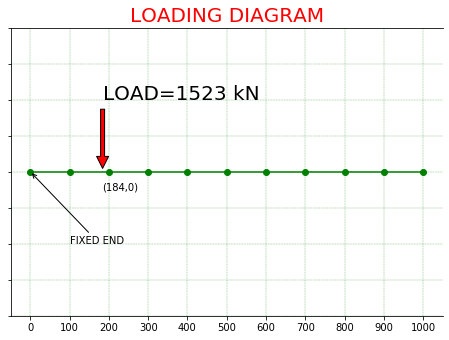

In [20]:
plot_loading(load_value=1523,load_position=184)

-------
**2. loads_applied_at_position(position, dataframe):**

- This function plots all the different intensity of loads applied at a given position.

- As for a given dataset (50 rows), load varies from 100kN to 1000kN, therefore at any given position 'x' all the loads must be applied there atleast once.
    - 50 rows = 10 load_values * 5 load_positions
    
- Therefore, this function shows the intensity of those load values and let's us cross check the process.

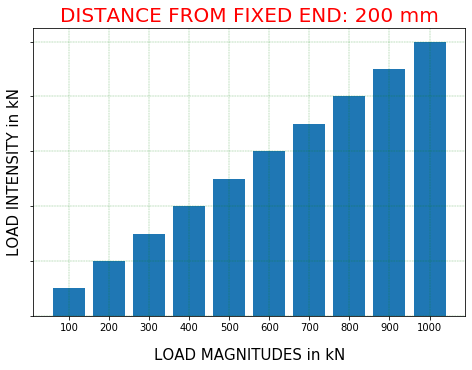

In [21]:
loads_applied_at_position(position=200,dataframe=DATASET[324])

-----------
**3. check_loading(load_values,load_position,dataframe):**

- This function is a testing function, it checks whether a particular load has been applied to all the positions or not.
    - Ex: It will check whether 100kN has been applied to all the different positions (1000 mm, 800 mm, 600 mm...200 mm) or not. And then again same process is repeated but this time load value becomes 200kN. The process is repeated until the last specified value of the load.

In [22]:
check_loading(load_values=[x for x in range(100,1100,100)],
             load_position=list(DATASET[6].columns)[-5:],
              dataframe=DATASET[6])

---------------x---------------
All Check Passed
---------------x---------------


----------
----------------------
## -----------------x-----------------Thank You------------------x------------------
-----------
------------